In [1]:
# dataframes
import pandas as pd
from numpy.random import rand, randn, beta, poisson
from numpy import sin
import numpy as np
import scipy
import math

# plotting
import matplotlib.pyplot as plt
import seaborn

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices 

# test mutual independence

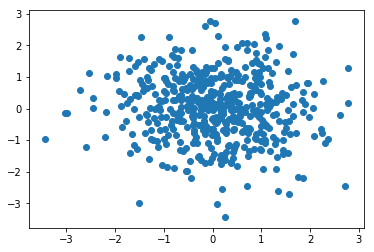

In [2]:
##  these errors are mutually independent 

# generate data
n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid

plt.scatter(resid[:-1], resid[1:])

In [3]:
def indep_resid(n=500):
    eps = randn(n) # independent normal(0,1)
    x   = 10*rand(n) # uniform(0,10)
    y   = x + eps

    # form and fit model
    model = sm.OLS(y, x).fit()
    return x,y,model.resid

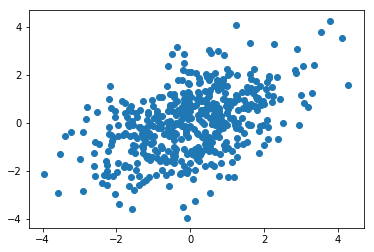

In [4]:
##  these errors are NOT mutually independent 

# generate data
n   = 500   # number of observations
a   = 1     # use this to control the correlation
w   = randn(n+1) # independent normal(0,1)
eps = w[:-1] + a*w[1:] # normal, not independent
x   = 10*rand(n) # uniform(0,10)
y   = x + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid

plt.scatter(resid[:-1], resid[1:])

In [5]:
def dep_resid(n=500, a=1):
    w   = randn(n+1) # independent normal(0,1)
    eps = w[:-1] + a*w[1:] # normal, not independent
    x   = 10*rand(n) # uniform(0,10)
    y   = x + eps

    # form and fit model
    model = sm.OLS(y, x).fit()
    return x,y,model.resid

# test mutual independence by plotting autocorrelations

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.01729288, -0.01699377, -0.02996657,  0.0127399 , -0.06129511,
        -0.04119645,  0.0235254 , -0.02184826, -0.0801595 , -0.03080047,
         1.        , -0.03080047, -0.0801595 , -0.02184826,  0.0235254 ,
        -0.04119645, -0.06129511,  0.0127399 , -0.02996657, -0.01699377,
         0.01729288]),
 <matplotlib.lines.Line2D at 0x1c21800128>)

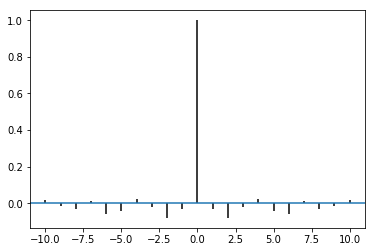

In [6]:
x,y,resid = indep_resid()
plt.acorr(resid)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.01149913,  0.00389999,  0.02033177,  0.00395888,  0.00595951,
         0.03853064,  0.02362923,  0.0523827 ,  0.09075891,  0.53886167,
         1.        ,  0.53886167,  0.09075891,  0.0523827 ,  0.02362923,
         0.03853064,  0.00595951,  0.00395888,  0.02033177,  0.00389999,
        -0.01149913]),
 <matplotlib.lines.Line2D at 0x1c218bd6a0>)

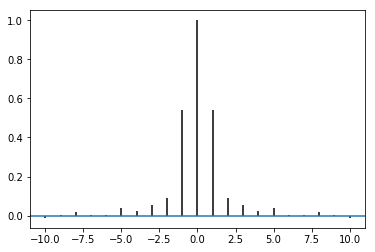

In [7]:
x,y,resid = dep_resid()
plt.acorr(resid)

# test linearity (equivalently, independence of residuals and covariates)

In [8]:
# example: y is linear in x

n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid
yhat = model.predict()

Text(0, 0.5, 'residual')

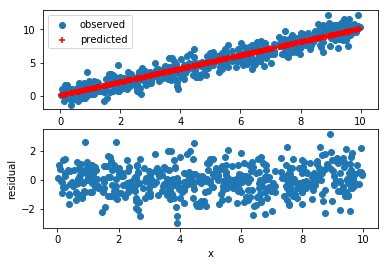

In [9]:
# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence - notice no relation between x and residual
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")


## example: y is not linear in x. Fix by adding more features to model.

In [58]:
n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + x**2 + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid
yhat = model.predict()

Text(0, 0.5, 'residual')

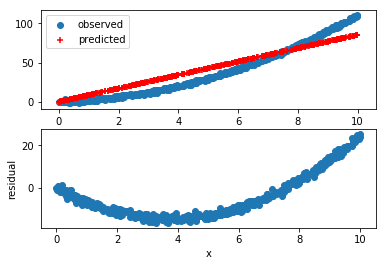

In [59]:
# visually test for nonlinearity - predictions are bad, and residuals are not independent of input variable

# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence  - notice quadratic relation between x and residual!
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")

In [60]:
# example: y is not linear in x
# fix the problem by fitting a more sophisticated model

n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + x**2 + eps

# form and fit model
df = pd.DataFrame()
df['x'] = x
df['xsq'] = x**2
model = sm.OLS(y, df).fit()

resid = model.resid
yhat = model.predict()

Text(0, 0.5, 'residual')

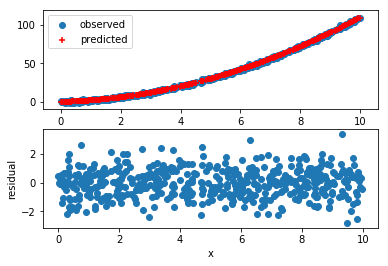

In [61]:
# now visually test for nonlinearity - it's gone, and predictions are good!

# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence  - notice quadratic relation between x and residual!
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")

## example: y is not linear in x; fix with a log transform

Text(0, 0.5, 'residual')

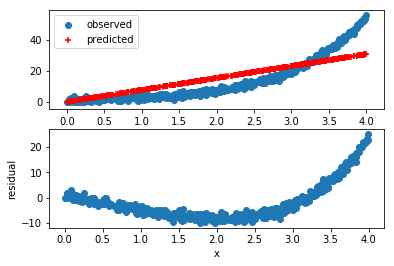

In [56]:
n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 4*rand(n) # uniform(0,10)
y   = np.maximum(np.exp(x) + eps, .1)

# form and fit model
model = sm.OLS(y, x).fit()

resid = model.resid
yhat = model.predict()

# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence  - notice quadratic relation between x and residual!
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")

Text(0, 0.5, 'residual')

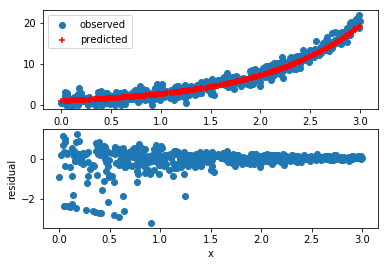

In [57]:
# fix the problem by transforming y before fitting
n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 3*rand(n) # uniform(0,10)
y   = np.maximum(np.exp(x) + eps, .1)

# form and fit model
model = sm.OLS(np.log(y), x).fit()

resid = model.resid
yhat = np.exp(model.predict())

# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence  - notice quadratic relation between x and residual!
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")

## residuals are better than raw data for assessing nonlinearity

In [14]:
n = 200
x1 = beta(2,2,n)
x2 = randn(n)
y = sin(2*math.pi*x1) + 2*x2 + .23*randn(n)

# QQ plots for assessing normality

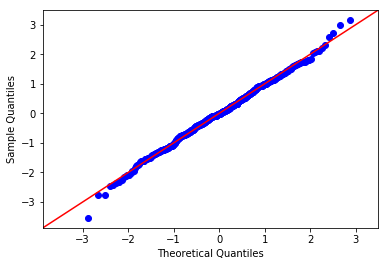

In [15]:
n=500
eps = randn(n) # normal residuals 
x = 10*rand(n)
y = x + eps
model = sm.OLS(y,x).fit()

# scipy.stats.probplot(data, dist="norm", plot=plt);
sm.qqplot(model.resid, line='45');

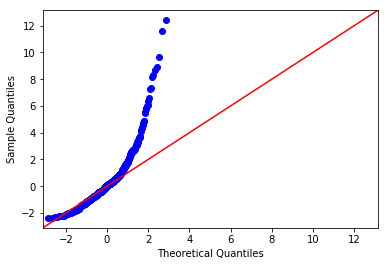

In [32]:
n=500
eps = np.exp(randn(n)) # right-skewed residuals 
x = 10*rand(n)
y = x + eps
model = sm.OLS(y,x).fit()

# scipy.stats.probplot(data, dist="norm", plot=plt);
sm.qqplot(model.resid, line='45');

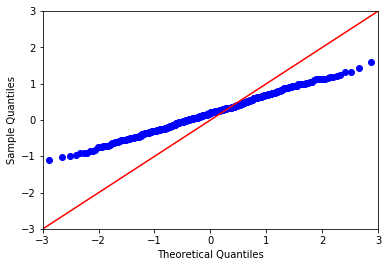

In [30]:
n=500
eps = np.sqrt(np.abs(randn(n))) # light-tailed residuals 
x = 10*rand(n)
y = x + eps
model = sm.OLS(y,x).fit()

# scipy.stats.probplot(data, dist="norm", plot=plt);
sm.qqplot(model.resid, line='45');

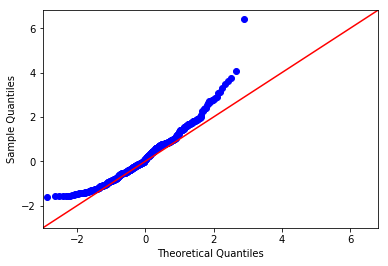

In [19]:
n=500
eps = poisson(1,n) # right-skewed residuals
x = 10*rand(n)
y = x + eps
model = sm.OLS(y,x).fit()

# scipy.stats.probplot(data, dist="norm", plot=plt);
sm.qqplot(model.resid, line='45');

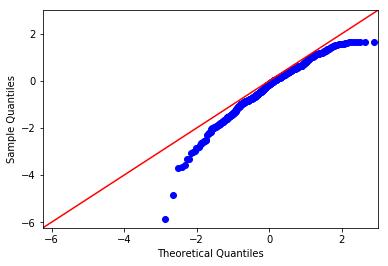

In [20]:
n=500
eps = -poisson(1,n) # left-skewed residuals
x = 10*rand(n)
y = x + eps
model = sm.OLS(y,x).fit()

# scipy.stats.probplot(data, dist="norm", plot=plt);
sm.qqplot(model.resid, line='45');

# Checking homoskedasticity

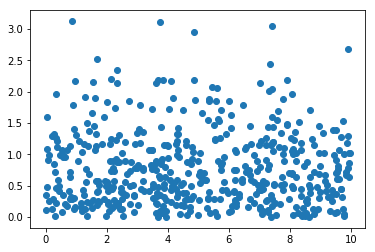

In [33]:
# homoskedstic: no relation between x and absolute residual
n=500
eps = randn(n)
x = 10*rand(n)
y = x + eps
model = sm.OLS(y,x).fit()
plt.scatter(x,np.abs(model.resid))

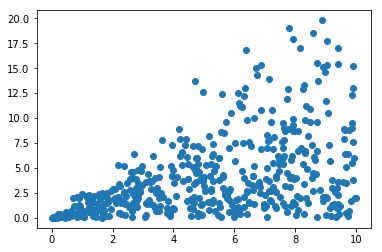

In [34]:
# heteroskedstic: no relation between x and absolute residual
n=500
x = 10*rand(n)
eps = x*randn(n) # variance of noise depends on x
y = x + eps
model = sm.OLS(y,x).fit()
plt.scatter(x,np.abs(model.resid))